In [1]:
import pandas as pd
import os
import re
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
output_d = 'images/'

In [3]:
df = pd.read_csv("../data/MUWIS-dataset/self_ratings.csv")
df.shape

(235, 8)

In [4]:
df.head(3)

,PID,topicID,topic_familiarity,topic_interest,topic_difficulty,info_revelance,info_difficulty,task_order
0,PA5,314.0,4,5,2,5,1,8.0
1,PA5,320.0,2,4,5,5,2,9.0
2,PA5,353.0,2,5,4,4,1,3.0


In [5]:
plist = sorted(df.PID.unique(), key=lambda x: int(x[2:]))
print(len(plist), plist)

20 ['PA5', 'PA6', 'PA8', 'PA9', 'PA11', 'PA12', 'PA13', 'PA17', 'PA18', 'PA19', 'PA20', 'PA21', 'PA22', 'PA26', 'PA27', 'PA29', 'PA30', 'PA31', 'PA32', 'PA33']


In [6]:
 df[['topic_difficulty','topic_familiarity','topic_interest','info_difficulty','info_revelance',]].describe().loc[['mean', 'std']].round(1)

,topic_difficulty,topic_familiarity,topic_interest,info_difficulty,info_revelance
mean,2.5,2.7,3.5,1.9,4.0
std,1.1,1.2,1.1,1.0,1.1


# analysis ratings by participants

In [106]:
crop = df[['PID','topic_familiarity','topic_interest','topic_difficulty','info_revelance','info_difficulty']]
crop = crop.groupby('PID').mean().round(1)
crop

,topic_familiarity,topic_interest,topic_difficulty,info_revelance,info_difficulty
PID,,,,,
PA11,1.7,3.2,3.3,4.5,1.7
PA12,3.6,3.4,2.4,3.4,2.4
PA13,2.3,3.9,2.5,3.6,1.9
PA17,2.6,3.6,2.8,3.8,3.3
PA18,2.9,3.6,2.0,4.2,2.2
PA19,3.4,4.0,1.8,4.3,1.5
PA20,2.9,3.2,3.0,3.8,2.4
PA21,1.3,1.7,3.2,3.7,2.4
PA22,3.3,3.9,2.1,3.3,1.2


In [108]:
# crop.to_csv('results/ratings_summary_by_PID.csv')

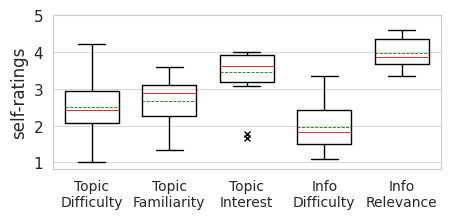

In [69]:
plt.figure(figsize=(5, 2))
sns.set_style('whitegrid')

sns.boxplot(data=pd.melt(crop), x='variable', y='value',\
            order=['topic_difficulty','topic_familiarity', 'topic_interest', 'info_difficulty', 'info_revelance'],
           **{
    'linewidth': 1,
    'width': 0.7,
    'fill': False,
    'color': 'k',
     'flierprops': {"marker": "x", 'markersize':5},
     'medianprops':{"color": "red", "linewidth": 0.6},
    'showmeans': True, 'meanline': True, 'meanprops': {'color': 'green','ls': '--', 'lw': 0.6},
})


plt.ylabel('self-ratings', size=12)
plt.yticks(size=11)
plt.xlabel('')
plt.yticks(range(1,6))
plt.xticks(range(5), ['Topic\nDifficulty','Topic\nFamiliarity', 'Topic\nInterest', \
            'Info\nDifficulty', 'Info\nRelevance', ], size=10)
plt.grid(axis='y', color='grey', alpha=0.3)

# plt.savefig(output_d+'self-ratings-all.pdf', bbox_inches='tight')
plt.show()

# ratings by topic

In [7]:
crop = df[['topicID', 'topic_difficulty','topic_familiarity','topic_interest','info_difficulty','info_revelance',]]
crop = crop.melt(id_vars='topicID',var_name='rating items', value_name='score')
crop['topicID'] = crop['topicID'].astype(int).astype(str)
crop

,topicID,rating items,score
0,314,topic_difficulty,2
1,320,topic_difficulty,5
2,353,topic_difficulty,4
3,355,topic_difficulty,4
4,416,topic_difficulty,4
...,...,...,...
1170,419,info_revelance,5
1171,708,info_revelance,2
1172,711,info_revelance,5
1173,725,info_revelance,4


In [33]:
crop.shape[0]/5

235.0

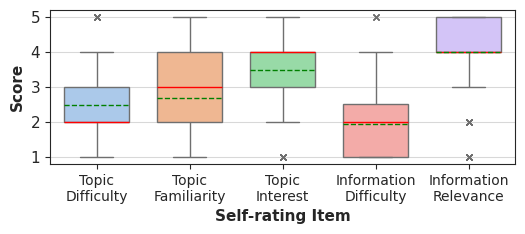

In [35]:
plt.figure(figsize=(6, 2))
sns.set_style('ticks')

sns.boxplot(data=crop[['rating items', 'score']], x='rating items', y='score', hue='rating items',palette='pastel',
            order=['topic_difficulty','topic_familiarity', 'topic_interest', 'info_difficulty', 'info_revelance'],
           **{
    'linewidth': 1,
    'width': 0.7,
    # 'fill': False,
    # 'color': 'k',
     'flierprops': {"marker": "x", 'markersize':5},
     'medianprops':{"color": "red", "linewidth": 1},
    'showmeans': True, 'meanline': True, 'meanprops': {'color': 'green','ls': '--', 'lw': 1},
})


plt.xlabel('Self-rating Item', size=11, weight='bold')
plt.yticks(size=11)
plt.ylabel('Score',  size=11, weight='bold')
plt.yticks(range(1,6))
plt.xticks(range(5), ['Topic\nDifficulty','Topic\nFamiliarity', 'Topic\nInterest', \
            'Information\nDifficulty', 'Information\nRelevance', ], size=10)
plt.grid(axis='y', color='grey', alpha=0.3)
# plt.text(-1.1, 0.5, '(least)', size=10)
plt.savefig('images/self-ratings.pdf', bbox_inches='tight')
plt.show()

In [96]:
# df[['topicID', 'topic_difficulty','topic_familiarity','topic_interest','info_difficulty','info_revelance',]].groupby('topicID').mean().round(1).transpose().to_csv('results/rating_summary.csv')

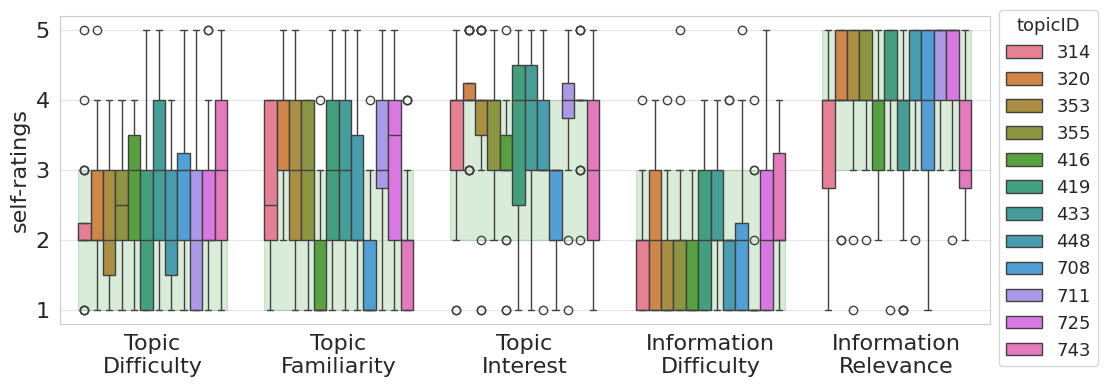

In [101]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 4))

SMALL_SIZE = 13
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

ax = sns.boxplot(x='rating items', y='score', hue='topicID', data=crop,
                order=['topic_difficulty','topic_familiarity', 'topic_interest', 'info_difficulty', 'info_revelance', ])

ax.axhspan(ymin=1, ymax=3, xmin=0.02, xmax=0.18, color='green', alpha=0.15)
ax.axhspan(ymin=1, ymax=3, xmin=0.22, xmax=0.38, color='green', alpha=0.15)
ax.axhspan(ymin=2, ymax=4, xmin=0.42, xmax=0.58, color='green', alpha=0.15)

ax.axhspan(ymin=1, ymax=3, xmin=0.62, xmax=0.78, color='green', alpha=0.15)
ax.axhspan(ymin=3, ymax=5, xmin=0.82, xmax=0.98, color='green', alpha=0.15)

plt.ylabel('self-ratings')
plt.xticks(range(5), ['Topic\nDifficulty','Topic\nFamiliarity', 'Topic\nInterest', \
            'Information\nDifficulty', 'Information\nRelevance', ])
plt.xlabel('')
# plt.title('Boxplot of Scores Grouped by Topic')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.05))
ax.grid(axis='y', alpha=0.5)
ax.set_facecolor("white")
# plt.text(-0.75, 0.5, '(least)', size=13)
plt.savefig(output_d+'rating_topics_all.pdf', bbox_inches='tight')
plt.show()

# attention checks

In [145]:
adf = pd.read_csv("../data/MUWIS-dataset/attention_checks.csv")
adf = adf.iloc[1:]
adf

,TopicID,314,320,353,355,448,708,711,725,743,416,419,433
1,PA5,1,1,1,1,1,1,0,0,1,1,1,1
2,PA6,1,1,1,1,1,1,1,1,1,1,1,1
3,PA8,1,1,1,1,1,0,0,1,1,1,0,0
4,PA9,1,1,1,1,1,1,1,0,1,1,1,0
5,PA11,1,0,1,1,1,1,0,0,1,1,1,0
6,PA12,1,0,1,1,1,1,1,0,1,1,1,0
7,PA13,1,1,1,1,1,1,0,1,1,1,1,0
8,PA17,1,1,1,1,1,1,1,0,1,1,1,1
9,PA18,1,1,1,0,0,0,0,0,0,0,0,0
10,PA19,1,1,1,1,1,1,1,0,0,1,1,1


In [149]:
adf = pd.melt(adf, ['TopicID'])
adf.rename(columns={'TopicID': 'PID', 'variable': 'topic'}, inplace=True)
adf

,PID,topic,value
0,PA5,314,1
1,PA6,314,1
2,PA8,314,1
3,PA9,314,1
4,PA11,314,1
...,...,...,...
235,PA30,433,1
236,PA31,433,1
237,PA32,433,0
238,PA33,433,1


In [150]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PID     240 non-null    object
 1   topic   240 non-null    object
 2   value   240 non-null    object
dtypes: object(3)
memory usage: 5.8+ KB


In [152]:
adf['value'] = adf['value'].astype(int)
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PID     240 non-null    object
 1   topic   240 non-null    object
 2   value   240 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.8+ KB


In [155]:
adf[['PID', 'value']].groupby('PID').mean().round(2)

,value
PID,
PA11,0.67
PA12,0.75
PA13,0.83
PA17,0.92
PA18,0.25
PA19,0.83
PA20,0.67
PA21,0.67
PA22,0.83


In [157]:
adf[['topic', 'value']].groupby('topic').mean().round(2)

,value
topic,
314,1.00
320,0.75
353,1.00
355,0.95
416,0.90
419,0.85
433,0.55
448,0.95
708,0.75


# queries

In [171]:
df = pd.read_csv("../data/MUWIS-dataset/text_querys.csv")
df

,PID,query,topic
0,PA6,NaN,314
1,PA8,What are proved health benefits of marine vege...,314
2,PA9,What are the health benefits of marine vegetat...,314
3,PA5,Health benefits of marine vegetation,314
4,PA11,What are the positive uses of marine vegetatio...,314
...,...,...,...
235,PA29,Provide more info about greek philosophy,433
236,PA30,event dates for greek stoic plays,433
237,PA31,NaN,433
238,PA32,stoic plays theatre,433


In [173]:
df= df.dropna()
df

,PID,query,topic
1,PA8,What are proved health benefits of marine vege...,314
2,PA9,What are the health benefits of marine vegetat...,314
3,PA5,Health benefits of marine vegetation,314
4,PA11,What are the positive uses of marine vegetatio...,314
6,PA13,What makes the marine vegetation so beneficial...,314
...,...,...,...
233,PA26,greek plays,433
234,PA27,Current events related to Greek philosophy,433
235,PA29,Provide more info about greek philosophy,433
236,PA30,event dates for greek stoic plays,433


In [176]:
df['count'] = df['query'].apply(lambda x: len(x.split(' ')))
df

,PID,query,topic,count
1,PA8,What are proved health benefits of marine vege...,314,9
2,PA9,What are the health benefits of marine vegetat...,314,8
3,PA5,Health benefits of marine vegetation,314,5
4,PA11,What are the positive uses of marine vegetatio...,314,15
6,PA13,What makes the marine vegetation so beneficial...,314,11
...,...,...,...,...
233,PA26,greek plays,433,2
234,PA27,Current events related to Greek philosophy,433,6
235,PA29,Provide more info about greek philosophy,433,6
236,PA30,event dates for greek stoic plays,433,6


In [181]:
df['count'].describe().loc[['mean', 'std', 'min', 'max']].round(1)

mean     8.3
std      3.4
min      2.0
max     19.0
Name: count, dtype: float64

In [183]:
df = pd.read_csv("../data/MUWIS-dataset/voice_querys.csv")
df = df.dropna()
df

,task,query,PID,topic
0,10,torches Down Project current status,PA5,416
1,12,fishing on road testing development,PA5,355
2,12,fishing boats in development,PA5,355
3,3,scientific projects in Antarctica symptoms of,PA5,353
4,4,how does weather affect ship cost,PA5,448
...,...,...,...,...
141,7,contemporary Greek stoic planes and Productions,PA31,433
142,7,contemporary Greek stoic plates and Productions,PA31,433
143,8,three gorgeous River Cruises,PA31,416
144,9,what are recycled car tyres to use,PA31,419


In [184]:
df['count'] = df['query'].apply(lambda x: len(x.split(' ')))
df['count'].describe().loc[['mean', 'std', 'min', 'max']].round(1)

mean     7.7
std      4.2
min      1.0
max     20.0
Name: count, dtype: float64